# 속성 데이터 회귀 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/car_regression.csv

--2021-08-29 11:49:00--  https://raw.githubusercontent.com/dhrim/cau_2021/master/material/deep_learning/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.01s   

2021-08-29 11:49:00 (5.05 MB/s) - ‘car_regression.csv’ saved [58697/58697]



In [3]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [4]:
print(train_x[:5])
print(train_y[:5])

[[-0.86291079 -1.00733903 -0.8695344  -1.16268096 -0.23246035  0.54846706
   0.          1.          0.        ]
 [ 0.30957112  0.35919889 -0.11611465  0.36545194 -0.01497955 -1.35177741
   1.          0.          0.        ]
 [ 1.48205303  1.48683159  0.53338513  1.08595837  0.67370968  0.81993056
   1.          0.          0.        ]
 [ 0.30957112  0.29230543  0.0137853   0.16884316  0.34748847 -0.80885042
   1.          0.          0.        ]
 [ 0.30957112 -0.30017955  0.74122506  0.50908231  0.09376086  0.54846706
   0.          1.          0.        ]]
[[ 1.0319121 ]
 [-0.69774672]
 [-0.05713234]
 [-0.69774672]
 [-0.92836789]]


In [5]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


# Template

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


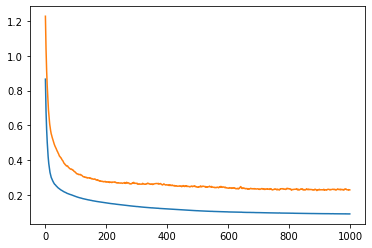

3/3 [==============================] - 0s 3ms/step - loss: 0.1339 - mae: 0.2710
loss= 0.13389632105827332
mae= 0.27104902267456055


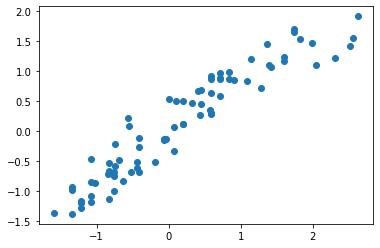

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(9,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()